# <span style="color:ORANGE">News Article Classification Project

## Project Video Link:-
https://drive.google.com/file/d/1nOFyCjIchXZvz7CAc73roU68NM5QdhPw/view?usp=sharing

## <span style="color:ORANGE">Overview
Every day, thousands of news articles are published across websites, news apps, and social media — covering topics like sports, politics, technology, health, and more.
Now imagine opening a news app and wanting to see only sports news. But what if the app doesn't know which articles are about sports? That would be frustrating.
Manually reading and tagging each article is impractical and time-consuming, especially when dealing with such large volumes.
This is where news article classification comes in.

- News article classification means teaching a computer (using machine learning) to read an article’s content and automatically decide which category it belongs to — like:
  - Sports
  - Politics
   - Technology
  - Health
   - Business, etc.
- Why Do We Need It?
  1. Fast Organization
        - News companies can automatically organize articles into categories without manual effort.
  2. Better User Experience
        -  Readers can quickly find news they care about — like technology or sports — without digging through everything.
   3. Smarter Recommendations
        - Platforms can suggest related articles based on what the user likes to read.

- Example

  Article Text	                                               - Predicted Category
 - "The Indian cricket team won the final match by 6 wickets."	Sports
  - "Apple announces the launch of its new iPhone 15 series."	   Technology
  - "The Parliament passed a bill on data privacy today."	      Politics

The goal of this project is to build a model that can do this classification automatically and accurately.



## <span style="color:ORANGE">Problem Statement

- In this project, our goal is to build a machine learning model that can automatically identify the category of a news article just by reading its text.

- For example:
   - If the article says:

      - “The Indian cricket team won the World Cup in an exciting final...” Our model should predict: Category → Sports

    - If it says:

      - “The government passed a new law on data protection...” It should predict: Category → Politics
- Main Objective
- We want to train a computer model to read a news article and then predict which topic it belongs to, such as:
   - Sports
   -  Politics
   -  Technology
   -   Business
   -    Health
- We Aiming to Achieve
     1. Build a Robust Classifier
       We will create a model that is capable of classifying articles from many categories, even if the topics or writing styles vary.
    2. Preprocess and Train Effectively
    3. Evaluate the Model’s Performance
-  Why This Matters
    Manual categorization of articles is time-consuming and error-prone. With automation, we can classify thousands of articles quickly and  consistently.

This helps:
- Readers find what they’re interested in
- News platforms organize content better
- Recommendation systems suggest related articles accurately

## <span style="color:ORANGE">Dataset Information

### <span style="color:ORANGE">Dataset Columns

| Column Name       | Description                                                                 |
|-------------------|------------------------------------------------------------------------------|
| `category`        | The label or target class – the topic the article belongs to (e.g., Sports, Politics) |
| `headline`        | The title or headline of the news article                                    |
| `links`           | A URL to the full article (can usually be ignored for classification)        |
| `short_description` | A brief summary or snippet of the article                                 |
| `keywords`        | Keywords related to the article content (optional, can help but not always clean) |


In [1]:
import pandas as pd # is used to load the data ,and data manipulation purpose
import numpy as np # it is used for the mathematical operation purpose

import matplotlib.pyplot as plt #It is for the visulization purpose
import seaborn as sns # Advanced visulization  pupose

from sklearn.model_selection import train_test_split #Splits the data into two parts training part and testing part 

from sklearn.feature_extraction.text import TfidfVectorizer #convert text into a numerical manner
# classification moddels
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk # Natural Language Toolkit — a library for text preprocessing.
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # Used to perform lemmatization ,which reduces a word to its base form 
# Download NLTK resources
# Downloads the required language data 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <span style="color:ORANGE">Data Collection and Preprocessing

In [2]:
df = pd.read_csv('data_news - data_news.csv') # Load the dataset

In [3]:
df.head() # Its  Shows the top 5 rows in the dataset

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [4]:
df.tail() #Its shows the last 5 rows in the dataset

,category,headline,links,short_description,keywords
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN
49999,SPORTS,"Simone Biles Isn't The Next Anyone, She's 'The...",https://www.huffingtonpost.com/entry/the-first...,The gymnast is in a league of her own.,the-first-simone-biles


In [5]:
df.shape #It shows the how many rows and how many coluns were present in our datasert

(50000, 5)

In [6]:
df.columns #It shows the all the columns in the data

Index(['category', 'headline', 'links', 'short_description', 'keywords'], dtype='object')

In [7]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (50000, 5)


In [8]:
print("\nCategory distribution:")
print(df['category'].value_counts()) # Its counts number of rows would be there per category


Category distribution:
category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


## <span style="color:ORANGE">Handling missing values

In [9]:
# Check for missing values
print(df.isnull().sum())
# Drop rows with any missing values
df.dropna(inplace=True)

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


## <span style="color:ORANGE">Handling duplicates

In [10]:
df.duplicated().sum() #it is used to see the if there any duplicated values

3962

In [11]:
df.drop_duplicates() #dropping the duplicated values

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
...,...,...,...,...,...
49988,SPORTS,Gregg Popovich Wishes He ‘Had The Guts’ To Dye...,https://www.huffingtonpost.com/entry/gregg-pop...,Monday’s events beg the question -- would a bl...,gregg-popovich-george-hill-hair-blond
49991,SPORTS,"Rafal Lipinski Nails Sick, Complicated Dunk",https://www.huffingtonpost.com/entry/rafal-lip...,"Plenty of air, plenty to do",rafal-lipinski-nails-sick-complicated-dunk
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs


In [12]:
# Combine relevant text fields
df['full_text'] = df['headline'] + ' ' + df['short_description']

## <span style="color:ORANGE">Text preprocessing

In [13]:
# Text cleaning function
def clean_text(text):
    # Check if the input is a string before processing
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string inputs

    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

In [14]:
# Apply cleaning to the my text column 
df['cleaned_text'] = df['full_text'].apply(clean_text)

In [15]:
# Lemmatization and stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    # Check if the input is a string before processing
    if not isinstance(text, str):
        return "" # Return an empty string for non-string inputs

    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


In [16]:
df['processed_text'] = df['cleaned_text'].apply(lemmatize_text) # Apply my text 

#  <span style="color:ORANGE">Feature Extraction

## <span style="color:ORANGE">TF_IDF

In [17]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

# Remove categories with only one sample
category_counts = df['category'].value_counts()
categories_to_keep = category_counts[category_counts > 1].index
df_filtered = df[df['category'].isin(categories_to_keep)]

# Create feature matrix
X = tfidf.fit_transform(df_filtered['processed_text'])
y = df_filtered['category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

###  <span style="color:ORANGE">Bag-of-Words using CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # unigrams and bigrams
    stop_words='english'
)

# Fit and transform the processed text
X_bow = bow_vectorizer.fit_transform(df_filtered['processed_text'])

# Output shape
print("Bag-of-Words Feature Matrix Shape:", X_bow.shape)


Bag-of-Words Feature Matrix Shape: (47332, 5000)


## <span style="color:ORANGE">Word Embeddings using Word2Vec

In [19]:
from gensim.models import Word2Vec

# Tokenize each sentence
tokenized_text = [text.split() for text in df_filtered['processed_text']]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4)

# <span style="color:ORANGE">Exploratory data analysis

In [20]:
# View category distribution
category_counts = df['category'].value_counts()
print(category_counts)


category
TRAVEL            4865
FOOD & DRINK      4863
ENTERTAINMENT     4855
WORLD NEWS        4851
SPORTS            4759
WELLNESS          4741
POLITICS          4712
STYLE & BEAUTY    4708
BUSINESS          4512
PARENTING         4466
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3996\3154539768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=category_counts.index, palette='viridis')


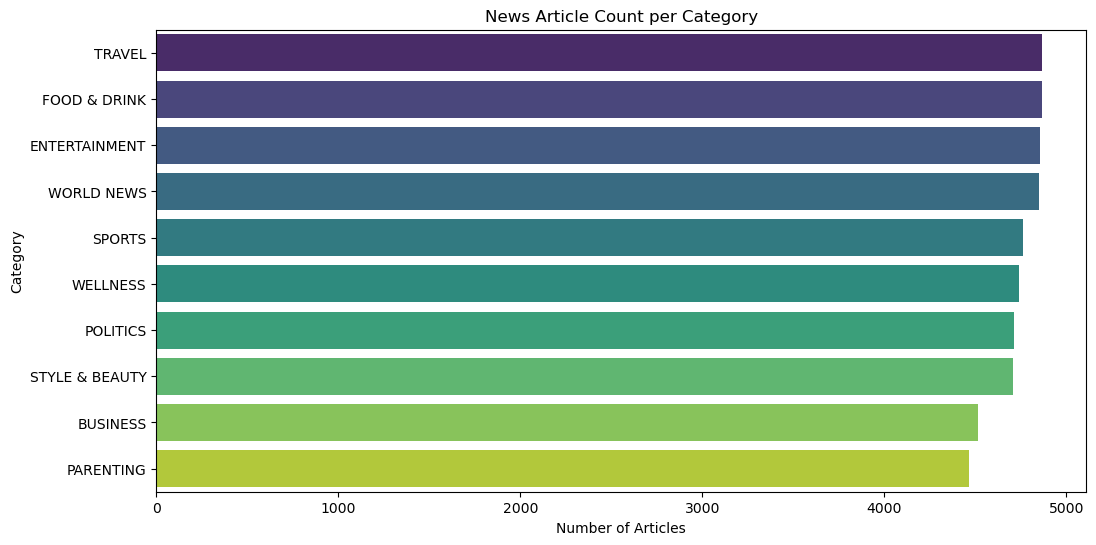

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=category_counts.index, palette='viridis')
plt.title("News Article Count per Category")
plt.xlabel("Number of Articles")
plt.ylabel("Category")
plt.show()


## Analyze
- Most Popular Topics (around 4800-4900 articles): Travel, Food & Drink, Entertainment, World News, and Sports. These are clearly the most written-about subjects.
- Next Tier (around 4500-4700 articles): Wellness, Politics, and Style & Beauty. These topics also have a lot of articles, just slightly less than the top group.
- Least Popular (around 4300-4400 articles): Business and Parenting. While still having a good number of articles, they are the least covered among the categories shown.
## Recommendation
- Go big where it's already big: Make more content about Travel, Food & Drink, Entertainment, World News, and Sports if you want to reach the most people.
- Good for general interest: Also cover Wellness, Politics, and Style & Beauty as they're quite popular too.
- Find your special spot: Focus on Business or Parenting if you want to stand out, as there's less content there, giving you a chance to be a go-to source for those topics!

In [22]:
# Remove categories with very few samples (e.g., only 1)
categories_to_keep = category_counts[category_counts > 1].index
df_filtered = df[df['category'].isin(categories_to_keep)]

# Re-check distribution
print(df_filtered['category'].value_counts())


category
TRAVEL            4865
FOOD & DRINK      4863
ENTERTAINMENT     4855
WORLD NEWS        4851
SPORTS            4759
WELLNESS          4741
POLITICS          4712
STYLE & BEAUTY    4708
BUSINESS          4512
PARENTING         4466
Name: count, dtype: int64


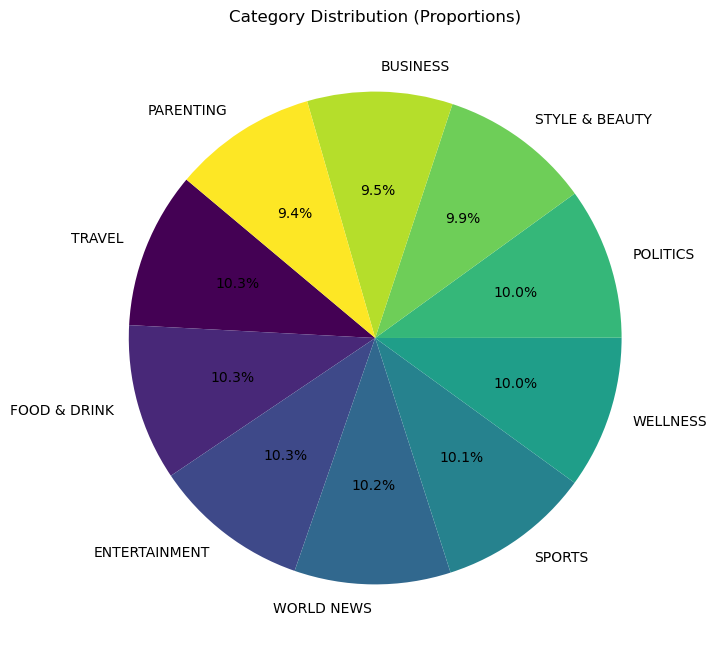

In [23]:
# Pie chart of category proportions
plt.figure(figsize=(8, 8))
df_filtered['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title("Category Distribution (Proportions)")
plt.ylabel("")
plt.show()


## Overall Observations:

- Remarkably Even Distribution: The most striking feature of this pie chart is the remarkably even distribution of articles across all categories. The proportions range only from 9.4% to 10.3%, which is a very narrow band. This suggests that the news source (or dataset) aims to cover a wide range of - topics without heavily favoring any single one.
- No Single Dominant Category: Unlike charts where one or two categories might take up a large majority, here the "pie" is cut into almost equal slices.
- The color scheme uses a gradient, but given the very similar proportions, it doesn't highlight drastic differences in size.
-In summary, the pie chart demonstrates a highly balanced approach to content distribution, with almost all categories receiving a very similar share of the total news articles.

C:\Users\HP\AppData\Local\Temp\ipykernel_3996\3922205193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='mako')


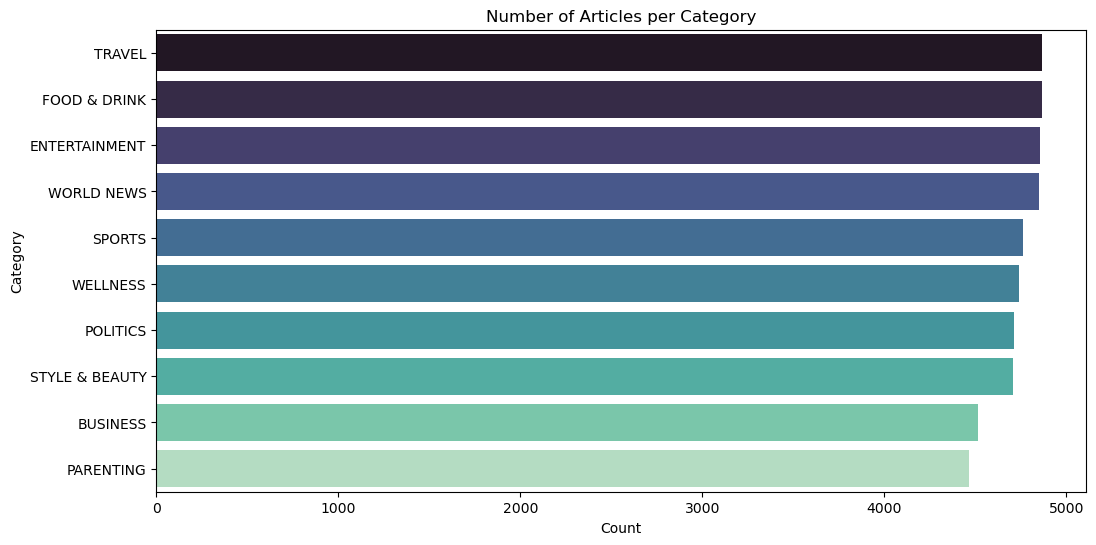

In [24]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='mako')
plt.title('Number of Articles per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


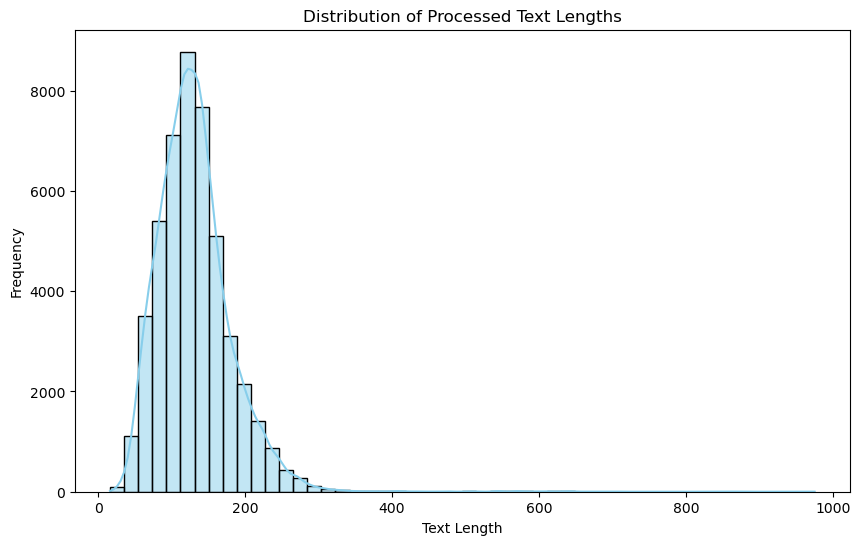

In [25]:
# Add a column with text length
df['text_length'] = df['processed_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Processed Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


This news collection offers a wide variety of topics that are fairly balanced in their overall numbers. Most articles are short and quick reads, making it easy to consume a lot of news. Many articles likely involve photos. When used for teaching computers, the testing is fair for all topics, but the computer gets more practice on the more popular news categories.

C:\Users\HP\AppData\Local\Temp\ipykernel_3996\3003733994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths.values, y=avg_lengths.index, palette='coolwarm')


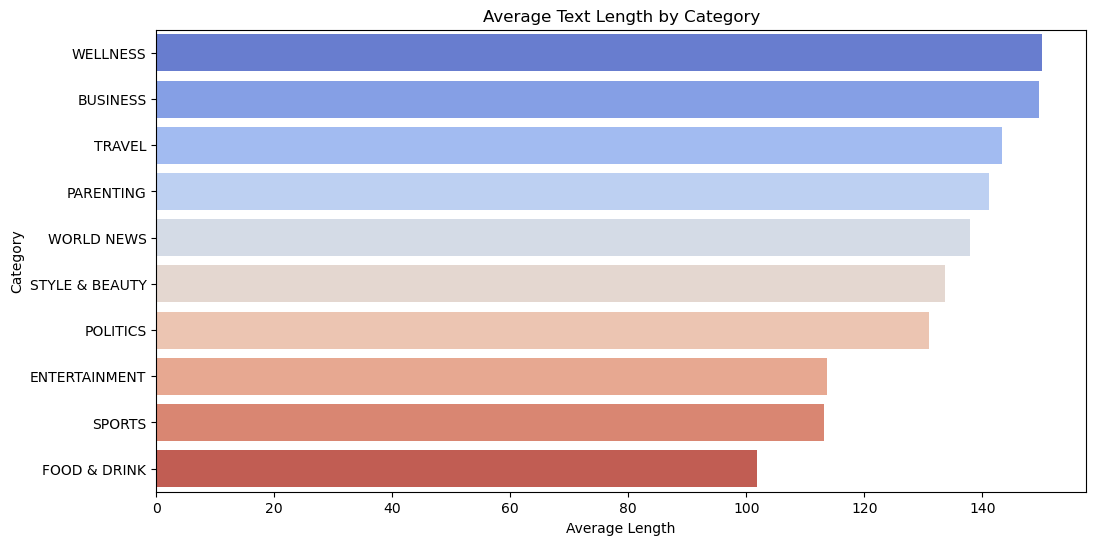

In [26]:
# Group by category and compute average length
avg_lengths = df.groupby('category')['text_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_lengths.values, y=avg_lengths.index, palette='coolwarm')
plt.title('Average Text Length by Category')
plt.xlabel('Average Length')
plt.ylabel('Category')
plt.show()


- Fast & Frequent News: If you want quick updates, look at Food & Drink, Entertainment, or Sports articles. They have lots of articles, but they're usually shorter.
- Deeper Dives: For more detailed reading, check out Wellness and Business articles. There are fewer of them, but they tend to be longer.
- Good Mix: Other categories like Travel, Politics, and World News offer a good balance of article quantity and moderate length.

In [27]:
from collections import Counter

def top_words_by_category(category, n=10):
    words = ' '.join(df[df['category'] == category]['processed_text']).split()
    freq = Counter(words).most_common(n)
    print(f"🔸 Top {n} words in {category}:")
    for word, count in freq:
        print(f"{word}: {count}")
    print("\n")

# Example for a few categories
top_words_by_category('POLITICS')
top_words_by_category('SPORTS')


🔸 Top 10 words in POLITICS:
state: 563
republican: 491
say: 441
new: 431
gop: 390
american: 385
obama: 378
year: 364
clinton: 360
one: 345


🔸 Top 10 words in SPORTS:
game: 747
team: 526
player: 504
nfl: 479
sport: 397
first: 390
win: 388
football: 378
video: 374
year: 372




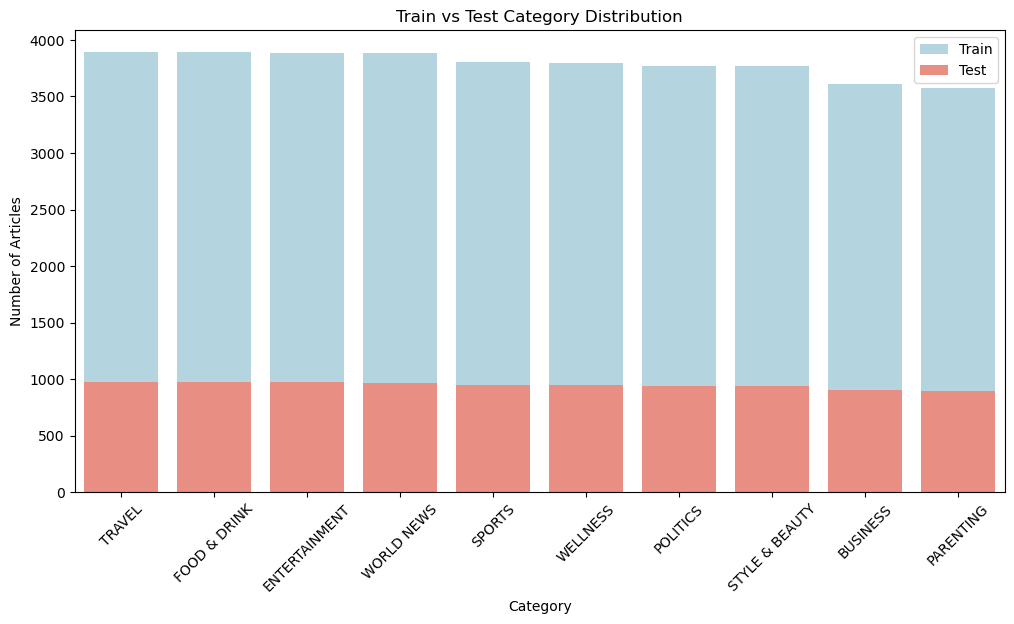

In [28]:
# Train-test split again (if needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['category'], test_size=0.2, stratify=df['category'], random_state=42)

# Plot
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=train_counts.index, y=train_counts.values, color='lightblue', label='Train')
sns.barplot(x=test_counts.index, y=test_counts.values, color='salmon', label='Test')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train vs Test Category Distribution")
plt.ylabel("Number of Articles")
plt.xlabel("Category")
plt.show()


The news articles cover many topics, with Travel, Food & Drink, and Entertainment having slightly more content than Business and Parenting. However, overall, article distribution across all categories is remarkably balanced, each making up about 9-10% of the total. The most frequent word is "photo," suggesting a strong visual component. When preparing data for a machine to learn, a consistent number of articles (around 1000) from each category is saved for testing, while the rest are used for training, leading to slightly varying training set sizes per category.

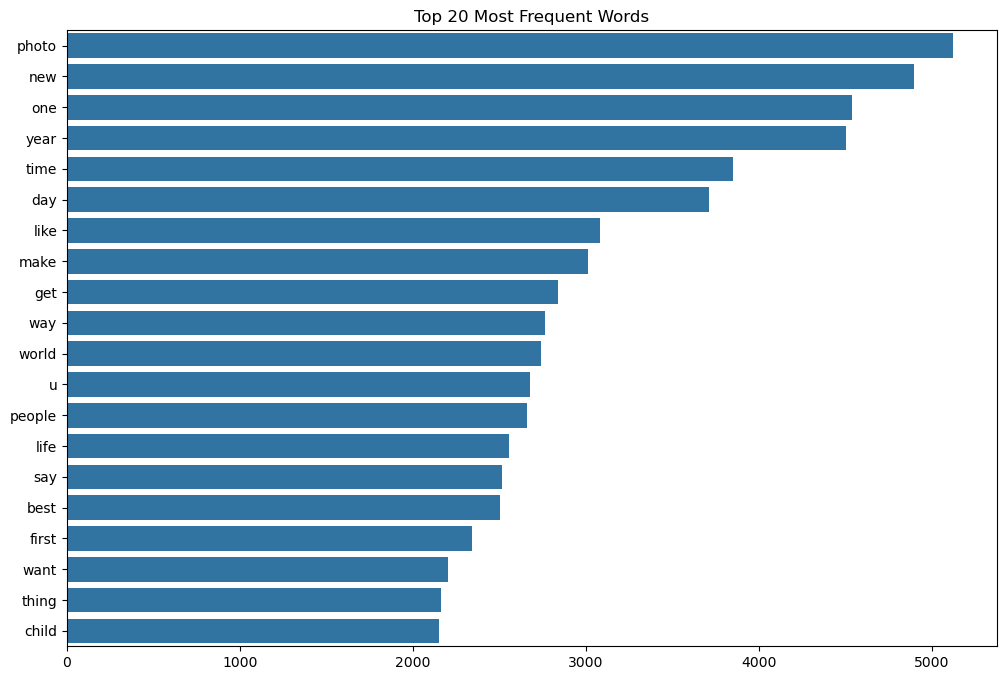

In [29]:
# Word frequency analysis
from collections import Counter
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
plt.title('Top 20 Most Frequent Words')
plt.show()

# <span style="color:ORANGE">Model Development

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

def evaluate_and_store(model, X_test, y_test, name, cv_scores):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"--- {name} Evaluation ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-------------------------------------------------\n")
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 1: Define X and y
X = df['processed_text']        # raw text data
y = df['category']       # target labels
# Step 2: Split into train and test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf = tfidf.transform(X_test_raw)
X_tfidf = tfidf.transform(X)  # needed for cross_val_score

## <span style="color:ORANGE">Logistic regression model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Logistic Regression with GridSearchCV
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']}

grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Logistic Regression Params:", grid.best_params_)

# Cross-validation
cv_scores = cross_val_score(best_model, X_tfidf, y, cv=5, scoring='accuracy')
# Evaluate
evaluate_and_store(best_model, X_test_tfidf, y_test, "Logistic Regression", cv_scores)

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
--- Logistic Regression Evaluation ---
Accuracy : 0.8072
Precision: 0.8080
Recall   : 0.8072
F1 Score : 0.8074

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.76      0.76       908
 ENTERTAINMENT       0.78      0.79      0.78       923
  FOOD & DRINK       0.85      0.85      0.85       987
     PARENTING       0.79      0.77      0.78       900
      POLITICS       0.80      0.75      0.77       955
        SPORTS       0.89      0.89      0.89       968
STYLE & BEAUTY       0.87      0.85      0.86       903
        TRAVEL       0.81      0.80      0.80       958
      WELLNESS       0.73      0.79      0.76       969
    WORLD NEWS       0.81      0.81      0.81       996

      accuracy                           0.81      9467
     macro avg       0.81      0.81      0.81      9467
  weighted avg       0.81      0.81      0.81      9467



## <span style="color:ORANGE">Naive Bayes (MultinomialNB)

In [33]:
# -----------------------------------------------------
# 📌 Model 2: Naive Bayes (MultinomialNB)
# -----------------------------------------------------
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Use the TF-IDF transformed data
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Cross-validation using full TF-IDF matrix
cv_scores_nb = cross_val_score(nb, X_tfidf, y, cv=5, scoring='accuracy')

# Evaluate and store
evaluate_and_store(nb, X_test_tfidf, y_test, "Naive Bayes", cv_scores_nb)

--- Naive Bayes Evaluation ---
Accuracy : 0.7917
Precision: 0.7926
Recall   : 0.7917
F1 Score : 0.7917

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.77      0.70      0.74       908
 ENTERTAINMENT       0.78      0.77      0.78       923
  FOOD & DRINK       0.82      0.86      0.84       987
     PARENTING       0.72      0.76      0.74       900
      POLITICS       0.79      0.74      0.76       955
        SPORTS       0.87      0.85      0.86       968
STYLE & BEAUTY       0.85      0.82      0.84       903
        TRAVEL       0.79      0.81      0.80       958
      WELLNESS       0.71      0.76      0.74       969
    WORLD NEWS       0.81      0.83      0.82       996

      accuracy                           0.79      9467
     macro avg       0.79      0.79      0.79      9467
  weighted avg       0.79      0.79      0.79      9467

-------------------------------------------------



##  <span style="color:ORANGE">Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Step 1: Split your raw text data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the pipeline (TF-IDF + RandomForest)
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # limit vocab to 5000 for speed
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Step 3: Define random search hyperparameter space
param_dist_rf = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Step 4: Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=4,  # tries only 4 combinations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_raw, y_train)

# Step 5: Evaluate the best model
best_rf = random_search_rf.best_estimator_
print("Best Random Forest Params:", random_search_rf.best_params_)

# Cross-validation on full data
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
# Final evaluation on test set
evaluate_and_store(best_rf, X_test_raw, y_test, "Random Forest", cv_scores_rf)


Best Random Forest Params: {'rf__n_estimators': 100, 'rf__max_depth': None}
--- Random Forest Evaluation ---
Accuracy : 0.7479
Precision: 0.7484
Recall   : 0.7479
F1 Score : 0.7466

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.78      0.79      0.79       908
 ENTERTAINMENT       0.67      0.68      0.68       923
  FOOD & DRINK       0.75      0.82      0.78       987
     PARENTING       0.74      0.77      0.75       900
      POLITICS       0.75      0.65      0.70       955
        SPORTS       0.84      0.92      0.88       968
STYLE & BEAUTY       0.81      0.81      0.81       903
        TRAVEL       0.75      0.64      0.69       958
      WELLNESS       0.63      0.70      0.66       969
    WORLD NEWS       0.76      0.70      0.73       996

      accuracy                           0.75      9467
     macro avg       0.75      0.75      0.75      9467
  weighted avg       0.75      0.75      0.75      9467

--------

## <span style="color:ORANGE">K-Nearest Neighbors (KNN)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

# Example: Let's assume your features are in X_raw (text data), and labels in y
# X_raw = df['short_description'] or X_raw = df['headline']
# y = df['category']

# Split raw text data (not yet vectorized)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: TF-IDF + KNN
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),              # Convert text to TF-IDF vectors
    ('knn', KNeighborsClassifier())            # Apply KNN classifier
])
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}
# Grid Search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_raw, y_train)
# Best model from grid search
best_model = grid.best_estimator_
print("Best KNN Params:", grid.best_params_)

# Evaluate using cross-validation on full dataset
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Now use your custom evaluation function
evaluate_and_store(best_model, X_test_raw, y_test, "K-Nearest Neighbors", cv_scores)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.662089          nan        nan 0.71213522 0.69768916 0.72568335]
  warnings.warn(


Best KNN Params: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
--- K-Nearest Neighbors Evaluation ---
Accuracy : 0.7436
Precision: 0.7438
Recall   : 0.7436
F1 Score : 0.7403

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.72      0.82      0.77       908
 ENTERTAINMENT       0.77      0.62      0.69       923
  FOOD & DRINK       0.72      0.87      0.79       987
     PARENTING       0.70      0.61      0.65       900
      POLITICS       0.77      0.70      0.73       955
        SPORTS       0.77      0.94      0.85       968
STYLE & BEAUTY       0.76      0.78      0.77       903
        TRAVEL       0.75      0.68      0.71       958
      WELLNESS       0.68      0.65      0.67       969
    WORLD NEWS       0.79      0.76      0.78       996

      accuracy                           0.74      9467
     macro avg       0.74      0.74      0.74      9467
  weighted avg       0.74      0.74      0.74      9467

---------

## <span style="color:ORANGE">Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Suppose your raw text is in X_raw, labels in y
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: TF-IDF + Decision Tree
pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # converts text to numerical
    ('dt', DecisionTreeClassifier(random_state=42))
])
 
param_grid = {
    'dt__max_depth': [None, 10, 20],
    'dt__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_raw, y_train)

best_model = grid.best_estimator_
print("Best Decision Tree Params:", grid.best_params_)

# Cross-validation on the full raw text data
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

evaluate_and_store(best_model, X_test_raw, y_test, "Decision Tree", cv_scores)

Best Decision Tree Params: {'dt__max_depth': None, 'dt__min_samples_split': 2}
--- Decision Tree Evaluation ---
Accuracy : 0.6468
Precision: 0.6441
Recall   : 0.6468
F1 Score : 0.6444

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.68      0.76      0.72       908
 ENTERTAINMENT       0.58      0.58      0.58       923
  FOOD & DRINK       0.72      0.71      0.71       987
     PARENTING       0.67      0.63      0.65       900
      POLITICS       0.58      0.54      0.56       955
        SPORTS       0.76      0.88      0.82       968
STYLE & BEAUTY       0.70      0.71      0.70       903
        TRAVEL       0.60      0.55      0.57       958
      WELLNESS       0.54      0.56      0.55       969
    WORLD NEWS       0.62      0.56      0.59       996

      accuracy                           0.65      9467
     macro avg       0.64      0.65      0.64      9467
  weighted avg       0.64      0.65      0.64      9467

-----

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.807225   0.807986  0.807225  0.807361   
1          Naive Bayes  0.791697   0.792645  0.791697  0.791690   
2        Random Forest  0.747861   0.748403  0.747861  0.746610   
3  K-Nearest Neighbors  0.743636   0.743776  0.743636  0.740297   
4        Decision Tree  0.646773   0.644140  0.646773  0.644377   

   CV Mean Accuracy    CV Std  
0          0.787881  0.001810  
1          0.778543  0.003892  
2          0.698597  0.001855  
3          0.697710  0.005768  
4          0.586960  0.006412  


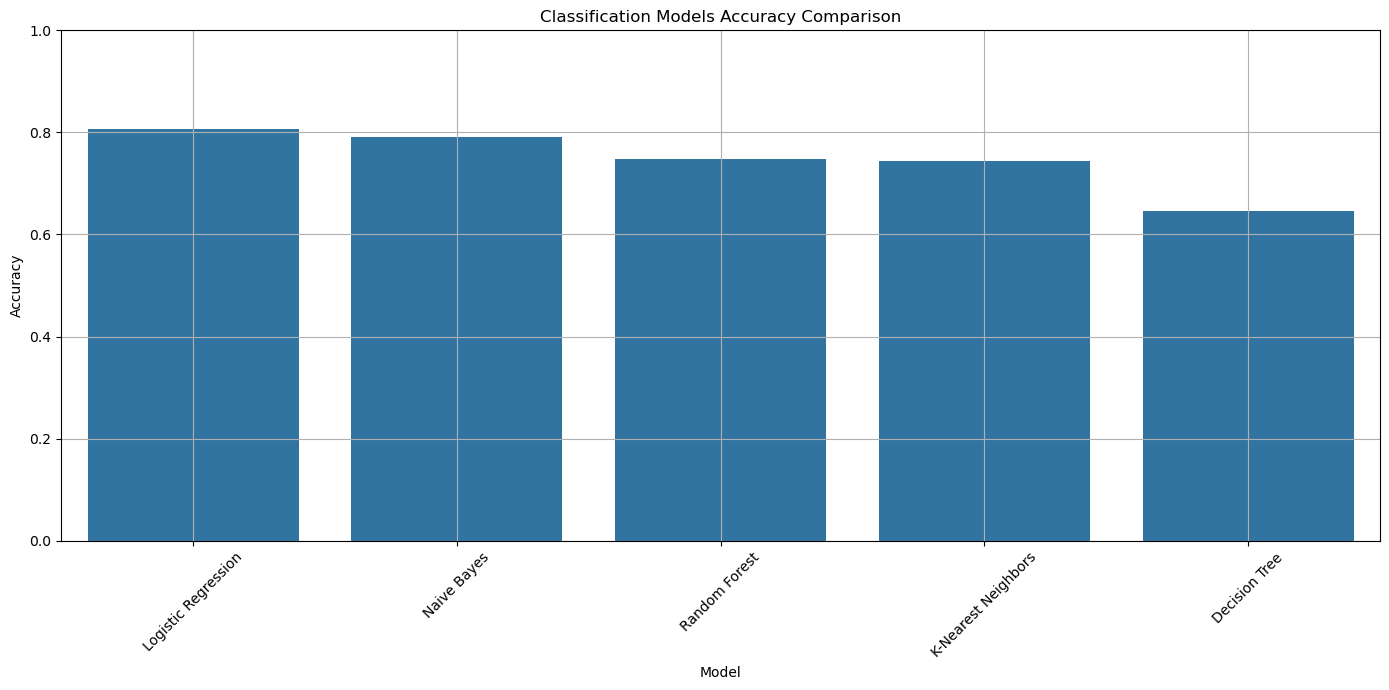

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)
plt.figure(figsize=(14,7))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Classification Models Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(True)
plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.807225   0.807986  0.807225  0.807361   
1          Naive Bayes  0.791697   0.792645  0.791697  0.791690   
2        Random Forest  0.747861   0.748403  0.747861  0.746610   
3  K-Nearest Neighbors  0.743636   0.743776  0.743636  0.740297   
4        Decision Tree  0.646773   0.644140  0.646773  0.644377   

   CV Mean Accuracy    CV Std  
0          0.787881  0.001810  
1          0.778543  0.003892  
2          0.698597  0.001855  
3          0.697710  0.005768  
4          0.586960  0.006412  


C:\Users\HP\AppData\Local\Temp\ipykernel_3996\1715226081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=results_df, palette='coolwarm')


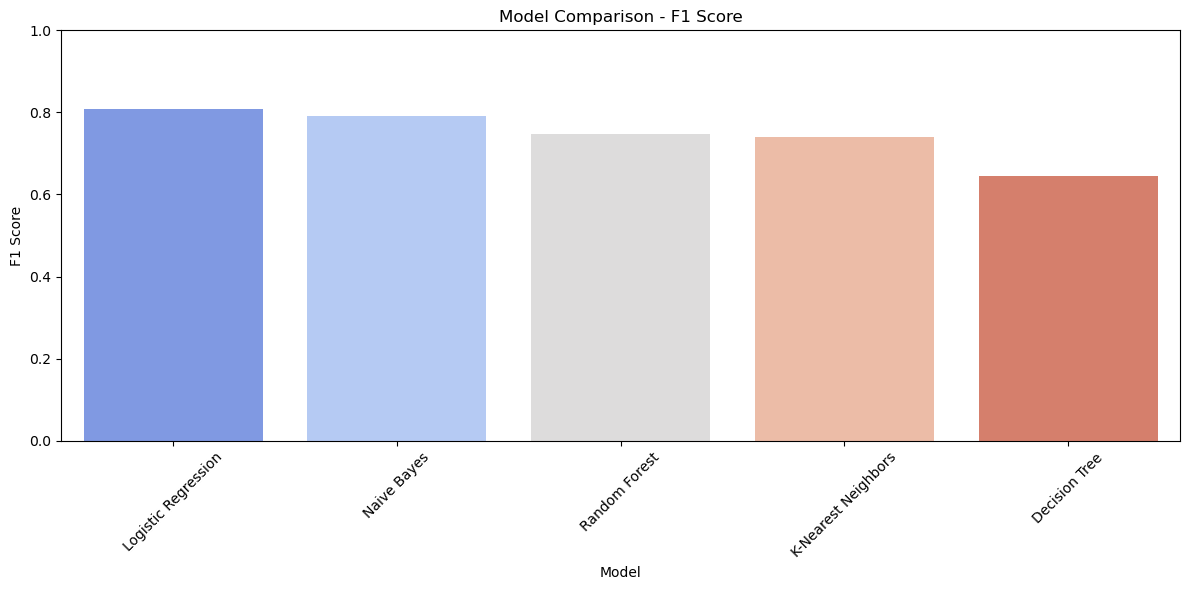

In [39]:
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
# Display table
print(results_df)
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Model Comparison - F1 Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Prediction function

In [55]:
def predict_category(user_input, model):
    """
    Predict the category of a given user input using the trained model and vectorizer from the pipeline.
    
    Parameters:
    user_input (str): The input text for prediction.
    model: The trained model pipeline (including vectorizer).
    
    Returns:
    str: Predicted category.
    """
    # Directly use the model pipeline to predict the category
    predicted_category = model.predict([user_input])[0]  # Model already handles vectorization
    return predicted_category


In [56]:
# Example usage of the prediction function
user_input = input("Enter news text: ")
predicted_category = predict_category(user_input, best_model)
print(f"\n📢 Predicted Category: {predicted_category}")


Enter news text:  The Tokyo 2020 Olympics are underway, with thousands of athletes competing in various events including swimming, athletics, and gymnastics."



📢 Predicted Category: SPORTS
